<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Forecasting(Airlines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
path = r"/content/Airlines+Data.xlsx"

In [3]:
data = pd.read_excel(path)

In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data['Year'] = data['Month'].dt.year
data['Month'] = data['Month'].dt.month

In [5]:
dummy_vars = pd.get_dummies(data['Month'], prefix='Month')
data = pd.concat([data, dummy_vars], axis=1)

In [6]:
X = data.drop(['Month', 'Year', 'Passengers'], axis=1)
y = data['Passengers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_pred, squared=False)
print("Linear Regression RMSE:", linear_reg_rmse)

Linear Regression RMSE: 83.4886219792853


In [8]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_reg_pred = tree_reg.predict(X_test)
tree_reg_rmse = mean_squared_error(y_test, tree_reg_pred, squared=False)
print("Decision Tree Regression RMSE:", tree_reg_rmse)

Decision Tree Regression RMSE: 80.63539626937585


In [9]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
forest_reg_pred = forest_reg.predict(X_test)
forest_reg_rmse = mean_squared_error(y_test, forest_reg_pred, squared=False)
print("Random Forest Regression RMSE:", forest_reg_rmse)

Random Forest Regression RMSE: 79.69377426609906


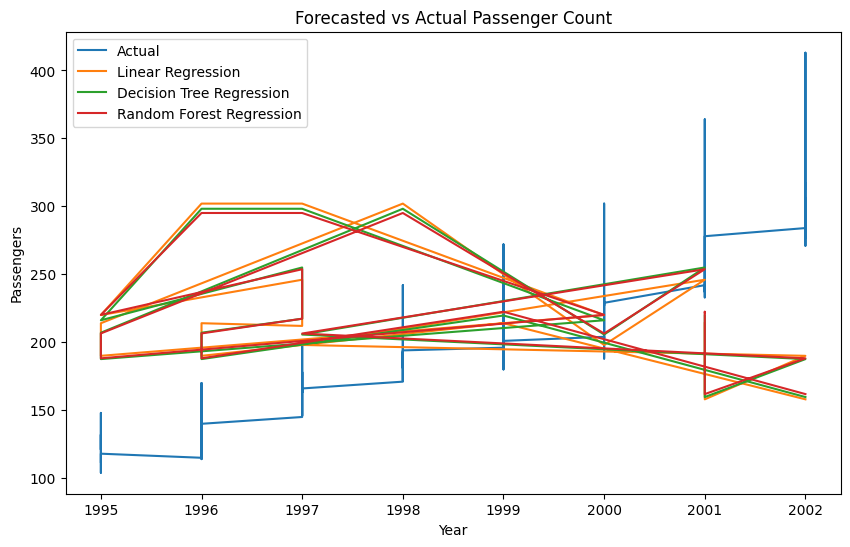

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Passengers'], label='Actual')
plt.plot(data['Year'].iloc[X_test.index], linear_reg_pred, label='Linear Regression')
plt.plot(data['Year'].iloc[X_test.index], tree_reg_pred, label='Decision Tree Regression')
plt.plot(data['Year'].iloc[X_test.index], forest_reg_pred, label='Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Forecasted vs Actual Passenger Count')
plt.legend()
plt.show()